# Potato Disease Classification
## Part 1: EDA

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
     ---------------------------------------- 7.5/7.5 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 470.9/470.9 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00




[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [8]:
# Declaring Constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
channels = 3 #RGB
epochs = 50

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    seed = 123,
    shuffle = True,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE, IMAGE_SIZE)
)

Found 2152 files belonging to 3 classes.


In [10]:
len(dataset)

68

Why it's 68, right? 68*32 equals the files 2152. length showing 68 because we chose batching before the training.

In [11]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

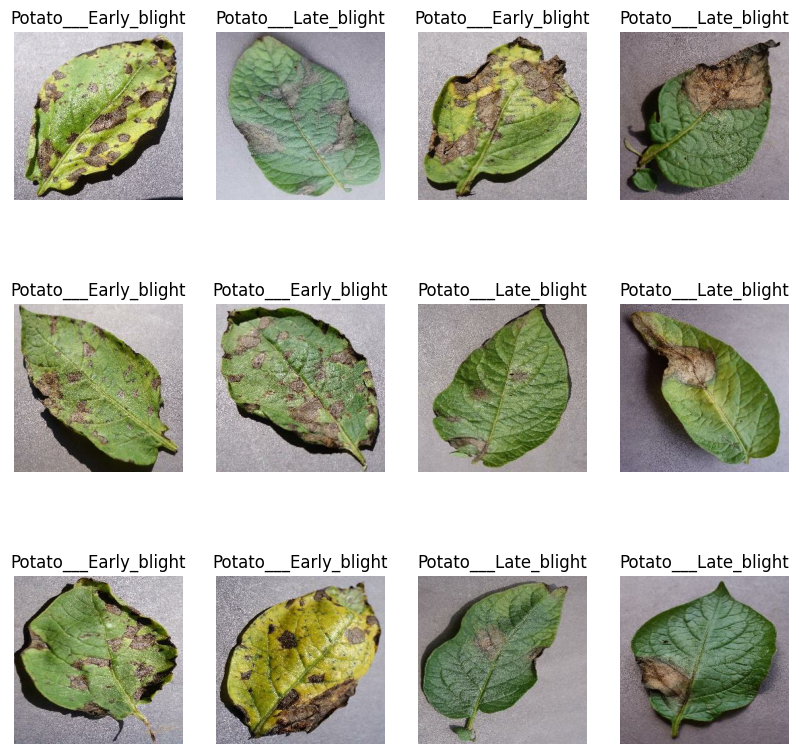

In [26]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

Function to Split Dataset

In [27]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [28]:
train_ds = dataset.take(54)
len(train_ds)

54

In [29]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [30]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [31]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [32]:
test_ds = test_ds.skip(6)
len(test_ds)

8

Now, we'll put them all in a function to get it more precise!

In [33]:
def ds_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split + test_split + val_split == 1)
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [34]:
train_ds, val_ds, test_ds = ds_partition(dataset)

Cache, Shuffling, and Prefetching Dataset

In [35]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)